This notebook contains scripts for the hopefully last model run of 10 fold. One without hiccups. The data below comes from a model that was run continously with no inturruptions

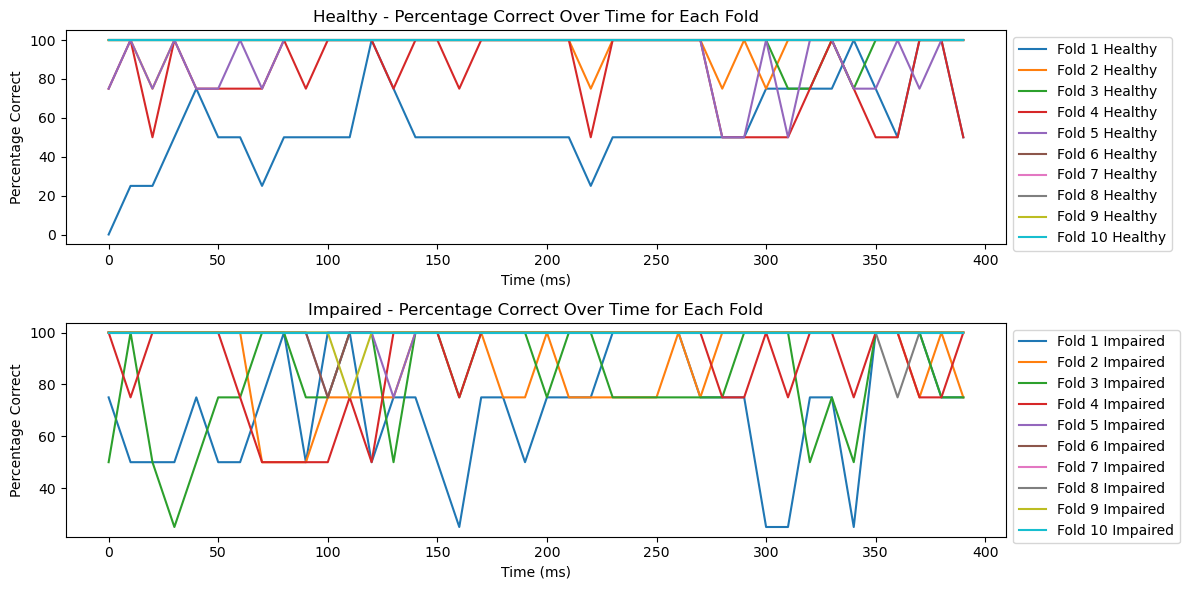

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Time': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
    'Fold 1 Healthy': [0,25,25,50,75,50,50,25,50,50,50,50,100,75,50,50,50,50,50,50,50,50,25,50,50,50,50,50,50,50,75,75,75,75,100,75,50,100,100,50],
    'Fold 1 Impaired': [75,50,50,50,75,50,50,75,100,50,100,100,50,75,75,50,25,75,75,50,75,75,75,100,100,100,100,75,75,75,25,25,75,75,25,100,100,100,75,75],
    'Fold 2 Healthy': [100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,75,100,75,100,100,100,100,100,100,100,100,100],
    'Fold 2 Impaired': [100,100,100,100,100,100,100,50,50,50,75,75,75,75,100,100,100,100,75,75,100,75,75,75,75,75,100,75,100,100,100,100,100,100,100,100,100,75,100,75],
    'Fold 3 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,75,100,75,100,100,100,100,100],
    'Fold 3 Impaired': [50,100,50,25,50,75,75,100,100,75,75,100,100,50,100,100,75,100,100,100,75,100,100,75,75,75,75,75,75,100,100,100,50,75,50,100,100,100,75,75],
    'Fold 4 Healthy': [75,100,50,100,75,75,75,75,100,75,100,100,100,75,100,100,75,100,100,100,100,100,50,100,100,100,100,100,50,50,50,50,75,100,75,50,50,100,100,50],
    'Fold 4 Impaired': [100,75,100,100,100,100,75,50,50,50,50,75,50,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,75,75,100,75,100,100,75,100,100,75,75,100],
    'Fold 5 Healthy': [75,100,75,100,75,75,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,50,50,100,50,100,100,75,75,100,75,100,100],
    'Fold 5 Impaired':[100,100,100,100,100,100,100,100,100,100,75,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 6 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 6 Impaired': [100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 7 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 7 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 8 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 8 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100],
    'Fold 9 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 9 Impaired': [100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 10 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 10 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
}
# # Print the length of each fold
# for key in data.keys():
#     if 'Fold' in key:
#         print(f"Length of {key}: {len(data[key])}")
# df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Healthy
plt.subplot(2, 1, 1)
for i in range(1, 11):
    plt.plot(df['Time'], df[f'Fold {i} Healthy'], label=f'Fold {i} Healthy')

plt.xlabel('Time (ms)')
plt.ylabel('Percentage Correct')
plt.title('Healthy - Percentage Correct Over Time for Each Fold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside

# Plot for Impaired
plt.subplot(2, 1, 2)
for i in range(1, 11):
    plt.plot(df['Time'], df[f'Fold {i} Impaired'], label=f'Fold {i} Impaired')

plt.xlabel('Time (ms)')
plt.ylabel('Percentage Correct')
plt.title('Impaired - Percentage Correct Over Time for Each Fold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

Plots for 10 folds which includes average accuracy for each class and their total performance over time

Overall Average Accuracy for Healthy: 92.50%
Overall Average Accuracy for Hearing Impaired: 92.38%
Overall Average Total Performance: 92.44%


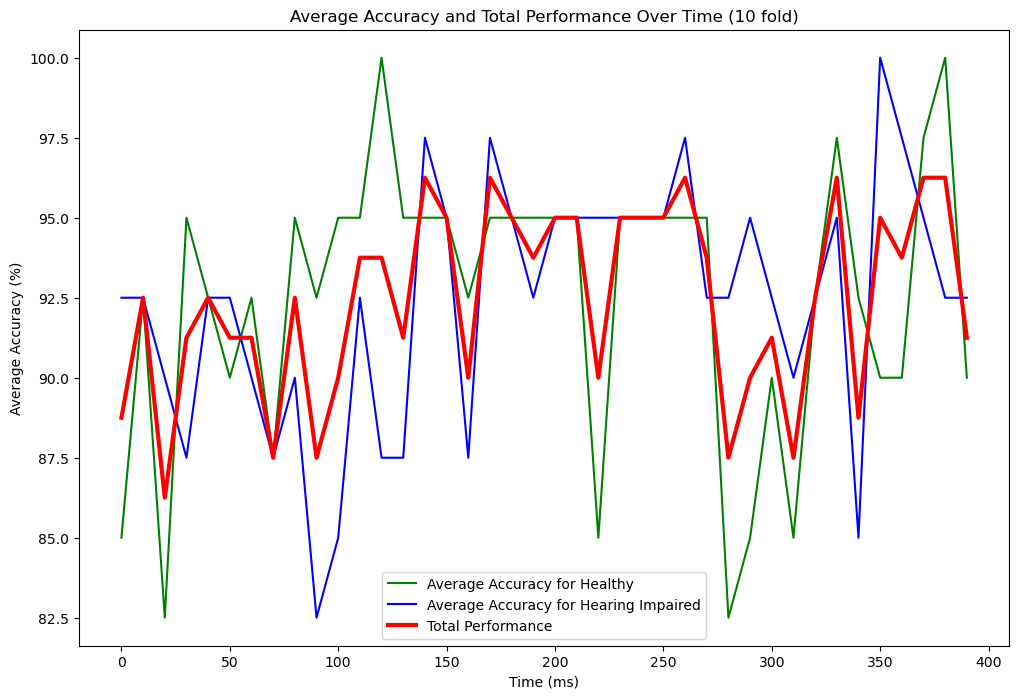

Differences Array:
Differences Array:
Differences Array:
[ -7.5   0.   -7.5   7.5   0.   -2.5   2.5   0.    5.   10.   10.    2.5
  12.5   7.5  -2.5   0.    5.   -2.5   0.    2.5   0.    0.  -10.    0.
   0.    0.   -2.5   2.5 -10.  -10.   -2.5  -5.    0.    2.5   7.5 -10.
  -7.5   2.5   7.5  -2.5]


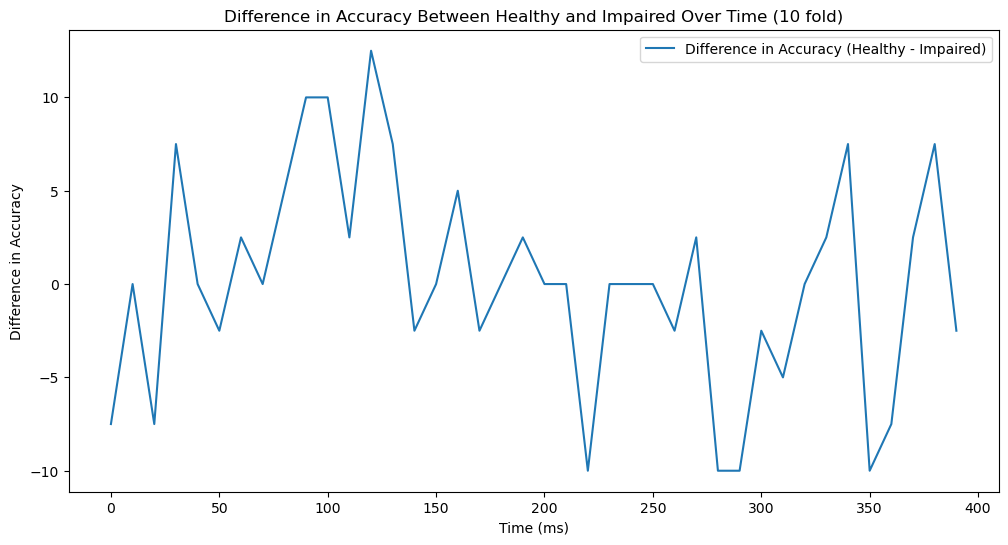

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
# Sample data
data = {
    'Time': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
    'Fold 1 Healthy': [0,25,25,50,75,50,50,25,50,50,50,50,100,75,50,50,50,50,50,50,50,50,25,50,50,50,50,50,50,50,75,75,75,75,100,75,50,100,100,50],
    'Fold 1 Impaired': [75,50,50,50,75,50,50,75,100,50,100,100,50,75,75,50,25,75,75,50,75,75,75,100,100,100,100,75,75,75,25,25,75,75,25,100,100,100,75,75],
    'Fold 2 Healthy': [100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,75,100,75,100,100,100,100,100,100,100,100,100],
    'Fold 2 Impaired': [100,100,100,100,100,100,100,50,50,50,75,75,75,75,100,100,100,100,75,75,100,75,75,75,75,75,100,75,100,100,100,100,100,100,100,100,100,75,100,75],
    'Fold 3 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,75,100,75,100,100,100,100,100],
    'Fold 3 Impaired': [50,100,50,25,50,75,75,100,100,75,75,100,100,50,100,100,75,100,100,100,75,100,100,75,75,75,75,75,75,100,100,100,50,75,50,100,100,100,75,75],
    'Fold 4 Healthy': [75,100,50,100,75,75,75,75,100,75,100,100,100,75,100,100,75,100,100,100,100,100,50,100,100,100,100,100,50,50,50,50,75,100,75,50,50,100,100,50],
    'Fold 4 Impaired': [100,75,100,100,100,100,75,50,50,50,50,75,50,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,75,75,100,75,100,100,75,100,100,75,75,100],
    'Fold 5 Healthy': [75,100,75,100,75,75,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,50,50,100,50,100,100,75,75,100,75,100,100],
    'Fold 5 Impaired':[100,100,100,100,100,100,100,100,100,100,75,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 6 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 6 Impaired': [100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 7 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 7 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 8 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 8 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100],
    'Fold 9 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 9 Impaired': [100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 10 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 10 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
}

df = pd.DataFrame(data)

# Plotting the top three plots together
plt.figure(figsize=(12, 8))

# Plot Average Accuracy for Healthy
df_healthy = df.filter(like='Healthy').mean(axis=1)
plt.plot(df['Time'], df_healthy, label='Average Accuracy for Healthy', color='green')
# print(df_healthy.to_frame().T.to_string(index=False))

# Calculate the overall average of Healthy accuracy across all time points
df_healthy_avg = df.filter(like='Healthy').mean(axis=1) / 100  # Divide by 100
average_accuracy_healthy = df_healthy_avg.mean()
print(f'Overall Average Accuracy for Healthy: {average_accuracy_healthy:.2%}')

# Plot Average Accuracy for Impaired
df_impaired = df.filter(like='Impaired').mean(axis=1)
plt.plot(df['Time'], df_impaired, label='Average Accuracy for Hearing Impaired', color='blue')
# print(df_impaired.to_frame().T.to_string(index=False))

# Calculate the overall average of Impaired accuracy across all time points
df_impaired_avg = df.filter(like='Impaired').mean(axis=1) /100
average_accuracy_impaired = df_impaired_avg.mean()
print(f'Overall Average Accuracy for Hearing Impaired: {average_accuracy_impaired:.2%}')

# Calculate the difference between Healthy and Impaired at each time point
df_difference = df_healthy - df_impaired
# print(df_difference.to_frame().T.to_string(index=False))


# Plot Total Performance
df_total = df.iloc[:, 1:].mean(axis=1)
plt.plot(df['Time'], df_total, label='Total Performance', color='red', linewidth=3)

# Calculate the overall average of Total Performance across all time points
df_total_avg = df.iloc[:, 1:].mean(axis=1) / 100  # Divide by 100
average_accuracy_total = df_total_avg.mean()
print(f'Overall Average Total Performance: {average_accuracy_total:.2%}')

# Set y-axis limits for the top three plots
# plt.ylim(60, 110)

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy and Total Performance Over Time (10 fold)')
plt.legend()

# Show the top three plots
plt.show()


# Store the differences in a NumPy array
differences_array = df_difference.to_numpy()


# DataFrame directly from the NumPy array
differences_df = pd.DataFrame(differences_array, columns=['Difference'], index=df_difference.index)
# Print the differences array
print("Differences Array:")
# print(tabulate(differences_df, headers='keys', tablefmt='pretty'))

# Print the differences array using to_string
print("Differences Array:")
# print(differences_df.to_string())

# Print the differences array
print("Differences Array:")
print(differences_array)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df_difference, label='Difference in Accuracy (Healthy - Impaired)')
# plt.ylim(60, 110)  # Set y-axis limits

plt.xlabel('Time (ms)')
plt.ylabel('Difference in Accuracy')
plt.title('Difference in Accuracy Between Healthy and Impaired Over Time (10 fold)')
plt.legend()

# Display the plot
plt.show()

# Plot Average Accuracy for Healthy
df_healthy = df.filter(like='Healthy').mean(axis=1)
healthy_string = df_healthy.to_frame().T.to_string(index=False, col_space=7)

# Plot Average Accuracy for Impaired
df_impaired = df.filter(like='Impaired').mean(axis=1)
impaired_string = df_impaired.to_frame().T.to_string(index=False, col_space=7)

# Calculate the difference between Healthy and Impaired at each time point
df_difference = df_healthy - df_impaired
difference_string = df_difference.to_frame().T.to_string(index=False, col_space=7)

# Save the strings to a text file
with open('output10Fold.txt', 'w') as f:
    f.write(healthy_string + '\n\n' + impaired_string + '\n\n' + difference_string)

10 fold (including all subjects): calculate the percentage accuracy for each subject by counting the number of correct predictions and dividing it by the total number of images for that subject

In [7]:
import os

# Function to parse a line and extract information
def parse_line(line, line_number):
    try:
        parts = line.strip().split()
        image_name = parts[0]
        true_label = int(parts[1])
        predicted_label = float(parts[2])  # Use float instead of int for predicted label
        subject_number = int(image_name.split('_')[-1].split('-')[-1].split('.')[0])
        return subject_number, image_name, true_label, predicted_label
    except ValueError as e:
        print(f"Error parsing line {line_number}: {e}")
        print(f"Line content: {line}")
        raise  # Re-raise the exception to stop the program

# Function to process a file and calculate accuracy for each subject
def process_file(file_path):
    subject_results = {}
    
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            if line.startswith('Image Name'):
                continue  # Skip header line
            subject_number, image_name, true_label, predicted_label = parse_line(line, line_number)
            
            # Initialize subject results if not already present
            if subject_number not in subject_results:
                subject_results[subject_number] = {'correct': 0, 'total': 0}
            
            # Update results based on the classification
            if true_label == predicted_label:
                subject_results[subject_number]['correct'] += 1
            subject_results[subject_number]['total'] += 1

            # Print true and predicted labels for each image
            # print(f"Image: {image_name}, True Label: {true_label}, Predicted Label: {predicted_label}")

    # Calculate and print accuracy for each subject
    print(f"\nAccuracy for each subject in {file_path}:")
    for subject, results in subject_results.items():
        accuracy = (results['correct'] / results['total']) * 100 if results['total'] > 0 else 0
        print(f"Subject {subject}: {accuracy:.2f}% ({results['correct']} out of {results['total']} images)")

# Specify the directory containing the text files
directory_path = "/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/10folds - 80-20 train test split (includes all subjects)/classification result 2"

# List all text files in the directory
txt_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.txt')])
print(txt_files)
# Process each text file
for txt_file in txt_files:
    file_path = os.path.join(directory_path, txt_file)
    process_file(file_path)


['10fold_classification_results_fold_1.txt', '10fold_classification_results_fold_10.txt', '10fold_classification_results_fold_2.txt', '10fold_classification_results_fold_3.txt', '10fold_classification_results_fold_4.txt', '10fold_classification_results_fold_5.txt', '10fold_classification_results_fold_6.txt', '10fold_classification_results_fold_7.txt', '10fold_classification_results_fold_8.txt', '10fold_classification_results_fold_9.txt']

Accuracy for each subject in /home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/10folds - 80-20 train test split (includes all subjects)/classification result 2/10fold_classification_results_fold_1.txt:
Subject 30: 90.00% (36 out of 40 images)
Subject 33: 35.00% (14 out of 40 images)
Subject 34: 30.00% (12 out of 40 images)
Subject 35: 67.50% (27 out of 40 images)
Subject 6: 50.00% (20 out of 40 images)
Subject 12: 85.00% (34 out of 40 images)
Subject 18: 62.50% (25 out of 40 images)
Subject 20: 85.00% (34 out of 40 images)

Ac

script to save the values above in a txt file

In [8]:
import os

# Function to parse a line and extract information
def parse_line(line, line_number):
    try:
        parts = line.strip().split()
        image_name = parts[0]
        true_label = int(parts[1])
        predicted_label = float(parts[2])  # Use float instead of int for predicted label
        subject_number = int(image_name.split('_')[-1].split('-')[-1].split('.')[0])
        return subject_number, image_name, true_label, predicted_label
    except ValueError as e:
        print(f"Error parsing line {line_number}: {e}")
        print(f"Line content: {line}")
        raise  # Re-raise the exception to stop the program

# Function to process a file and calculate accuracy for each subject
def process_file(file_path):
    subject_results = {}
    
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            if line.startswith('Image Name'):
                continue  # Skip header line
            subject_number, image_name, true_label, predicted_label = parse_line(line, line_number)
            
            # Initialize subject results if not already present
            if subject_number not in subject_results:
                subject_results[subject_number] = {'correct': 0, 'total': 0}
            
            # Update results based on the classification
            if true_label == predicted_label:
                subject_results[subject_number]['correct'] += 1
            subject_results[subject_number]['total'] += 1

    # Calculate accuracy for each subject
    accuracy_info = []
    for subject, results in subject_results.items():
        accuracy = (results['correct'] / results['total']) * 100 if results['total'] > 0 else 0
        accuracy_info.append(f"Subject {subject}: {accuracy:.2f}% ({results['correct']} out of {results['total']} images)")

    return accuracy_info

# Specify the directory containing the text files
directory_path = "/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/10folds - 80-20 train test split (includes all subjects)/classification result 2"

# List all text files in the directory
txt_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.txt')])

# Process each text file and accumulate accuracy information
all_accuracy_info = []
for txt_file in txt_files:
    file_path = os.path.join(directory_path, txt_file)
    accuracy_info = process_file(file_path)
    all_accuracy_info.extend(accuracy_info)

# Write all accuracy information to a single text file
output_file_path = "all_accuracies_by_subject_10fold.txt"
with open(output_file_path, 'w') as output_file:
    output_file.write('\n'.join(all_accuracy_info))

print(f"All accuracy information written to {output_file_path}")


All accuracy information written to all_accuracies_by_subject_10fold.txt


script to sort the accuracies by subject by subject number

In [9]:
# Read data from the file
file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/all_accuracies_by_subject_10fold.txt'  # Replace with your actual file path

with open(file_path, 'r') as file:
    data = file.read()

# Split the data into lines
lines = data.split('\n')

# Sort lines by subject number
sorted_lines = sorted(lines, key=lambda x: int(x.split(':')[0].split()[-1]))

# Save sorted lines back to the original file
with open(file_path, 'w') as file:
    file.write('\n'.join(sorted_lines))


now calculate the average for each subject

In [11]:
# Read data from the sorted file
file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/all_accuracies_by_subject_10fold.txt'  # Replace with your actual file path
with open(file_path, 'r') as file:
    data = file.read()

# Split the data into lines
lines = data.split('\n')

# Initialize a dictionary to store the sum and count for each subject
subject_data = {}

# Process each line and calculate the sum and count for each subject
for line in lines:
    if line.strip():  # Check if the line is not empty
        subject, percentage = line.split(':')
        subject = subject.strip()
        percentage = float(percentage.split('%')[0])
        
        if subject in subject_data:
            subject_data[subject]['sum'] += percentage
            subject_data[subject]['count'] += 1
        else:
            subject_data[subject] = {'sum': percentage, 'count': 1}

# Calculate and print the average for each subject
for subject, data in subject_data.items():
    average = data['sum'] / data['count']
    print(f"{subject}: {average:.2f}% ({data['count']} out of {data['count']} images)")
    


Subject 1: 100.00% (2 out of 2 images)
Subject 2: 85.00% (3 out of 3 images)
Subject 3: 97.50% (1 out of 1 images)
Subject 4: 100.00% (3 out of 3 images)
Subject 5: 95.00% (2 out of 2 images)
Subject 6: 72.50% (2 out of 2 images)
Subject 7: 100.00% (2 out of 2 images)
Subject 9: 93.75% (2 out of 2 images)
Subject 10: 88.75% (2 out of 2 images)
Subject 11: 90.00% (2 out of 2 images)
Subject 12: 85.00% (1 out of 1 images)
Subject 13: 100.00% (1 out of 1 images)
Subject 14: 100.00% (1 out of 1 images)
Subject 15: 82.50% (1 out of 1 images)
Subject 16: 100.00% (1 out of 1 images)
Subject 17: 100.00% (2 out of 2 images)
Subject 18: 81.25% (2 out of 2 images)
Subject 19: 100.00% (2 out of 2 images)
Subject 20: 95.00% (3 out of 3 images)
Subject 21: 100.00% (3 out of 3 images)
Subject 22: 100.00% (3 out of 3 images)
Subject 23: 100.00% (1 out of 1 images)
Subject 24: 100.00% (1 out of 1 images)
Subject 25: 100.00% (1 out of 1 images)
Subject 26: 88.33% (3 out of 3 images)
Subject 27: 100.00% 

Line Graph of subject's accuracies by class

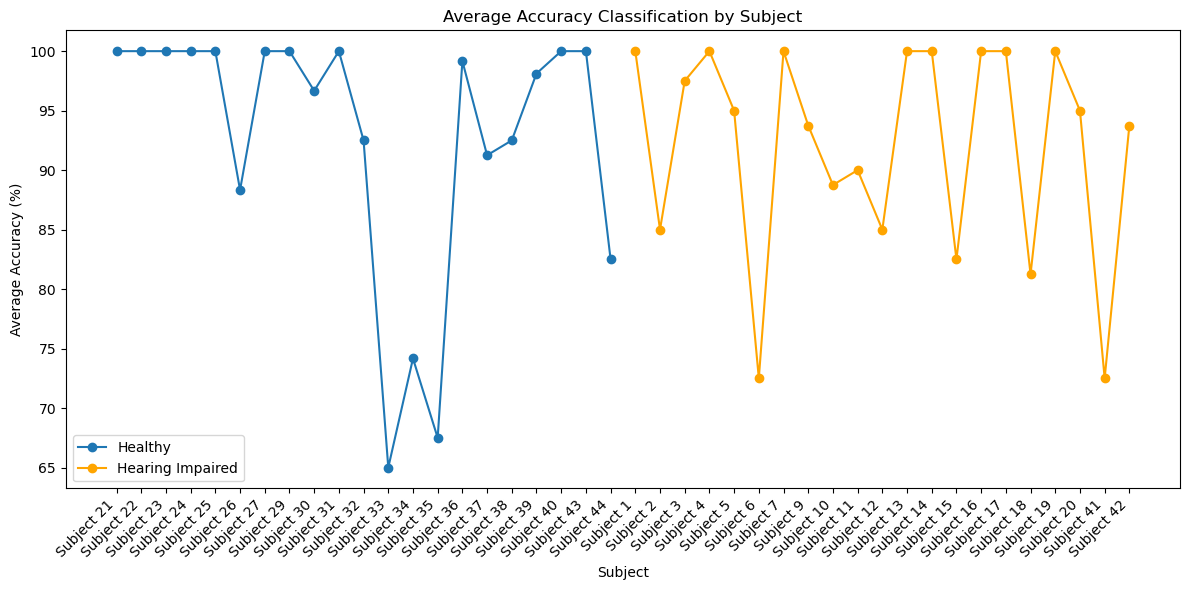

In [12]:
import matplotlib.pyplot as plt

# Your data
healthy_data = [
    ("Subject 21", 100.00),
    ("Subject 22", 100.00),
    ("Subject 23", 100.00),
    ("Subject 24", 100.00),
    ("Subject 25", 100.00),
    ("Subject 26", 88.33),
    ("Subject 27", 100.00),
    ("Subject 29", 100.00),
    ("Subject 30", 96.67),
    ("Subject 31", 100.00),
    ("Subject 32", 92.50),
    ("Subject 33", 65.00),
    ("Subject 34", 74.17),
    ("Subject 35", 67.50),
    ("Subject 36", 99.17),
    ("Subject 37", 91.25),
    ("Subject 38", 92.50),
    ("Subject 39", 98.12),
    ("Subject 40", 100.00),
    ("Subject 43", 100.00),
    ("Subject 44", 82.50)
]

# Your data for hearing impaired subjects
impaired_data = [
    ("Subject 1", 100.00),
    ("Subject 2", 85.00),
    ("Subject 3", 97.50),
    ("Subject 4", 100.00),
    ("Subject 5", 95.00),
    ("Subject 6", 72.50),
    ("Subject 7", 100.00),
    ("Subject 9", 93.75),
    ("Subject 10", 88.75),
    ("Subject 11", 90.00),
    ("Subject 12", 85.00),
    ("Subject 13", 100.00),
    ("Subject 14", 100.00),
    ("Subject 15", 82.50),
    ("Subject 16", 100.00),
    ("Subject 17", 100.00),
    ("Subject 18", 81.25),
    ("Subject 19", 100.00),
    ("Subject 20", 95.00),
    ("Subject 41", 72.50),
    ("Subject 42", 93.75)
]

# Extract subject numbers and accuracies
subjects_healthy = [subject for subject, _ in healthy_data]
accuracies_healthy = [accuracy for _, accuracy in healthy_data]

subjects_impaired = [subject for subject, _ in impaired_data]
accuracies_impaired = [accuracy for _, accuracy in impaired_data]

# Create a line graph for both healthy and impaired subjects
plt.figure(figsize=(12, 6))
plt.plot(subjects_healthy, accuracies_healthy, marker='o', linestyle='-', label='Healthy')
plt.plot(subjects_impaired, accuracies_impaired, marker='o', linestyle='-', color='orange', label='Hearing Impaired')

# Add labels and title
plt.xlabel('Subject')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy Classification by Subject')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Using early stopping

2024-01-21 05:25:52.056486: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 05:25:53.198652: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

2024-01-21 05:25:53.715920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 29s 618ms/step - loss: 0.7920 - accuracy: 0.5410
Epoch 2/60
45/45 [==============================] - 20s 438ms/step - loss: 0.6765 - accuracy: 0.5646
Epoch 3/60
45/45 [==============================] - 25s 561ms/step - loss: 0.5980 - accuracy: 0.6924
Epoch 4/60
45/45 [==============================] - 25s 553ms/step - loss: 0.5468 - accuracy: 0.7083
Epoch 5/60
45/45 [==============================] - 25s 548ms/step - loss: 0.5086 - accuracy: 0.7410
Epoch 6/60
45/45 [==============================] - 25s 550ms/step - loss: 0.4745 - accuracy: 0.7694
Epoch 7/60
45/45 [==============================] - 26s 559ms/step - loss: 0.4419 - accuracy: 0.7868
Epoch 8/60
45/45 [==============================] - 26s 572ms/step - loss: 0.4110 - accuracy: 0.8153
Epoch 9/60
45/45 [==============================] - 25s 557ms/step - loss: 0.3797 - accuracy: 0.8299
Epoch 10/60
45/45 [==============================] - 26s 583ms/step - loss: 0.3777 - accuracy: 0.8361


2024-01-21 05:55:16.783878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 277ms/step - loss: 2.1447 - accuracy: 0.6687

Evaluation for Fold 1:
Test Loss: 2.1447231769561768
Test Accuracy: 0.668749988079071


2024-01-21 05:55:20.759423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 3s 244ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 

2024-01-21 05:55:27.661086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 26s 543ms/step - loss: 0.7773 - accuracy: 0.4986
Epoch 2/60
45/45 [==============================] - 27s 596ms/step - loss: 0.6489 - accuracy: 0.6215
Epoch 3/60
45/45 [==============================] - 22s 476ms/step - loss: 0.5786 - accuracy: 0.7083
Epoch 4/60
45/45 [==============================] - 25s 549ms/step - loss: 0.5353 - accuracy: 0.7361
Epoch 5/60
45/45 [==============================] - 25s 556ms/step - loss: 0.4870 - accuracy: 0.7611
Epoch 6/60
45/45 [==============================] - 25s 548ms/step - loss: 0.4298 - accuracy: 0.7972
Epoch 7/60
45/45 [==============================] - 21s 463ms/step - loss: 0.4043 - accuracy: 0.8229
Epoch 8/60
45/45 [==============================] - 28s 615ms/step - loss: 0.3550 - accuracy: 0.8410
Epoch 9/60
45/45 [==============================] - 24s 523ms/step - loss: 0.3259 - accuracy: 0.8701
Epoch 10/60
45/45 [==============================] - 25s 548ms/step - loss: 0.2999 - accuracy: 0.8736


2024-01-21 06:28:33.944667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 317ms/step - loss: 1.6143 - accuracy: 0.7000

Evaluation for Fold 2:
Test Loss: 1.6143264770507812
Test Accuracy: 0.699999988079071


2024-01-21 06:28:37.875115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 3s 233ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 

2024-01-21 06:28:40.965310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 19s 419ms/step - loss: 0.7298 - accuracy: 0.5396
Epoch 2/60
45/45 [==============================] - 25s 561ms/step - loss: 0.6085 - accuracy: 0.6812
Epoch 3/60
45/45 [==============================] - 27s 598ms/step - loss: 0.5472 - accuracy: 0.7306
Epoch 4/60
45/45 [==============================] - 23s 495ms/step - loss: 0.5091 - accuracy: 0.7542
Epoch 5/60
45/45 [==============================] - 27s 598ms/step - loss: 0.4621 - accuracy: 0.7861
Epoch 6/60
45/45 [==============================] - 25s 558ms/step - loss: 0.4298 - accuracy: 0.8056
Epoch 7/60
45/45 [==============================] - 25s 543ms/step - loss: 0.3847 - accuracy: 0.8326
Epoch 8/60
45/45 [==============================] - 27s 605ms/step - loss: 0.3615 - accuracy: 0.8410
Epoch 9/60
45/45 [==============================] - 26s 575ms/step - loss: 0.3125 - accuracy: 0.8743
Epoch 10/60
45/45 [==============================] - 25s 543ms/step - loss: 0.2863 - accuracy: 0.8757


2024-01-21 06:58:41.246369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 135ms/step - loss: 3.0584 - accuracy: 0.4812

Evaluation for Fold 3:
Test Loss: 3.0584092140197754
Test Accuracy: 0.48124998807907104


2024-01-21 06:58:42.898839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 1s 136ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-21 06:58:45.826512: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 25s 543ms/step - loss: 0.7920 - accuracy: 0.5181
Epoch 2/60
45/45 [==============================] - 29s 630ms/step - loss: 0.6510 - accuracy: 0.6097
Epoch 3/60
45/45 [==============================] - 24s 516ms/step - loss: 0.5682 - accuracy: 0.6965
Epoch 4/60
45/45 [==============================] - 25s 560ms/step - loss: 0.5157 - accuracy: 0.7528
Epoch 5/60
45/45 [==============================] - 28s 612ms/step - loss: 0.4820 - accuracy: 0.7854
Epoch 6/60
45/45 [==============================] - 23s 510ms/step - loss: 0.4234 - accuracy: 0.8083
Epoch 7/60
45/45 [==============================] - 26s 580ms/step - loss: 0.3961 - accuracy: 0.8174
Epoch 8/60
45/45 [==============================] - 26s 583ms/step - loss: 0.3472 - accuracy: 0.8507
Epoch 9/60
45/45 [==============================] - 26s 569ms/step - loss: 0.3185 - accuracy: 0.8569
Epoch 10/60
45/45 [==============================] - 21s 469ms/step - loss: 0.3003 - accuracy: 0.8826


2024-01-21 07:31:31.341762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 286ms/step - loss: 4.7746 - accuracy: 0.5344

Evaluation for Fold 4:
Test Loss: 4.7745585441589355
Test Accuracy: 0.534375011920929


2024-01-21 07:31:35.121656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 3s 261ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-21 07:31:41.894884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 30s 631ms/step - loss: 0.7511 - accuracy: 0.5153
Epoch 2/60
45/45 [==============================] - 29s 648ms/step - loss: 0.6398 - accuracy: 0.6382
Epoch 3/60
45/45 [==============================] - 29s 627ms/step - loss: 0.5622 - accuracy: 0.7111
Epoch 4/60
45/45 [==============================] - 22s 479ms/step - loss: 0.5073 - accuracy: 0.7472
Epoch 5/60
45/45 [==============================] - 30s 658ms/step - loss: 0.4717 - accuracy: 0.7660
Epoch 6/60
45/45 [==============================] - 29s 647ms/step - loss: 0.4412 - accuracy: 0.7924
Epoch 7/60
45/45 [==============================] - 27s 604ms/step - loss: 0.3981 - accuracy: 0.8236
Epoch 8/60
45/45 [==============================] - 24s 530ms/step - loss: 0.3788 - accuracy: 0.8486
Epoch 9/60
45/45 [==============================] - 25s 560ms/step - loss: 0.3340 - accuracy: 0.8535
Epoch 10/60
45/45 [==============================] - 30s 661ms/step - loss: 0.3138 - accuracy: 0.8611


2024-01-21 08:05:02.195149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 5s 380ms/step - loss: 2.4469 - accuracy: 0.5781

Evaluation for Fold 5:
Test Loss: 2.4469194412231445
Test Accuracy: 0.578125


2024-01-21 08:05:07.088666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 3s 299ms/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-21 08:05:13.998970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 29s 602ms/step - loss: 0.6924 - accuracy: 0.5771
Epoch 2/60
45/45 [==============================] - 28s 615ms/step - loss: 0.5762 - accuracy: 0.6889
Epoch 3/60
45/45 [==============================] - 30s 651ms/step - loss: 0.5283 - accuracy: 0.7521
Epoch 4/60
45/45 [==============================] - 29s 641ms/step - loss: 0.4798 - accuracy: 0.7722
Epoch 5/60
45/45 [==============================] - 25s 535ms/step - loss: 0.4143 - accuracy: 0.8111
Epoch 6/60
45/45 [==============================] - 26s 579ms/step - loss: 0.3732 - accuracy: 0.8382
Epoch 7/60
45/45 [==============================] - 28s 616ms/step - loss: 0.3366 - accuracy: 0.8604
Epoch 8/60
45/45 [==============================] - 31s 675ms/step - loss: 0.2930 - accuracy: 0.8833
Epoch 9/60
45/45 [==============================] - 28s 625ms/step - loss: 0.2740 - accuracy: 0.8917
Epoch 10/60
45/45 [==============================] - 33s 730ms/step - loss: 0.2357 - accuracy: 0.9076


2024-01-21 08:38:45.534928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 332ms/step - loss: 4.1779 - accuracy: 0.5375

Evaluation for Fold 6:
Test Loss: 4.177850723266602
Test Accuracy: 0.5375000238418579


2024-01-21 08:38:49.637805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 266ms/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-21 08:38:55.206785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 24s 506ms/step - loss: 0.7404 - accuracy: 0.5208
Epoch 2/60
45/45 [==============================] - 31s 691ms/step - loss: 0.6433 - accuracy: 0.6326
Epoch 3/60
45/45 [==============================] - 28s 624ms/step - loss: 0.5843 - accuracy: 0.6819
Epoch 4/60
45/45 [==============================] - 22s 479ms/step - loss: 0.5271 - accuracy: 0.7417
Epoch 5/60
45/45 [==============================] - 28s 612ms/step - loss: 0.4843 - accuracy: 0.7701
Epoch 6/60
45/45 [==============================] - 28s 608ms/step - loss: 0.4395 - accuracy: 0.7924
Epoch 7/60
45/45 [==============================] - 28s 606ms/step - loss: 0.4035 - accuracy: 0.8104
Epoch 8/60
45/45 [==============================] - 28s 628ms/step - loss: 0.3631 - accuracy: 0.8410
Epoch 9/60
45/45 [==============================] - 29s 629ms/step - loss: 0.3246 - accuracy: 0.8639
Epoch 10/60
45/45 [==============================] - 27s 603ms/step - loss: 0.3024 - accuracy: 0.8868


2024-01-21 09:11:55.011678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 200ms/step - loss: 2.8142 - accuracy: 0.5969

Evaluation for Fold 7:
Test Loss: 2.814157247543335
Test Accuracy: 0.596875011920929


2024-01-21 09:11:57.525564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 194ms/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-21 09:12:01.843032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 30s 632ms/step - loss: 0.7176 - accuracy: 0.5722
Epoch 2/60
45/45 [==============================] - 29s 627ms/step - loss: 0.5662 - accuracy: 0.7083
Epoch 3/60
45/45 [==============================] - 31s 676ms/step - loss: 0.5127 - accuracy: 0.7444
Epoch 4/60
45/45 [==============================] - 30s 664ms/step - loss: 0.4515 - accuracy: 0.7931
Epoch 5/60
45/45 [==============================] - 26s 573ms/step - loss: 0.4308 - accuracy: 0.8097
Epoch 6/60
45/45 [==============================] - 27s 592ms/step - loss: 0.3929 - accuracy: 0.8292
Epoch 7/60
45/45 [==============================] - 31s 689ms/step - loss: 0.3658 - accuracy: 0.8472
Epoch 8/60
45/45 [==============================] - 29s 646ms/step - loss: 0.3337 - accuracy: 0.8667
Epoch 9/60
45/45 [==============================] - 27s 599ms/step - loss: 0.3051 - accuracy: 0.8889
Epoch 10/60
45/45 [==============================] - 25s 565ms/step - loss: 0.2973 - accuracy: 0.8806


2024-01-21 09:45:03.012793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 341ms/step - loss: 4.0020 - accuracy: 0.5375

Evaluation for Fold 8:
Test Loss: 4.002009391784668
Test Accuracy: 0.5375000238418579


2024-01-21 09:45:07.294756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 336ms/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-21 09:45:14.362032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 30s 639ms/step - loss: 0.7019 - accuracy: 0.5403
Epoch 2/60
45/45 [==============================] - 30s 654ms/step - loss: 0.5879 - accuracy: 0.6861
Epoch 3/60
45/45 [==============================] - 25s 558ms/step - loss: 0.5336 - accuracy: 0.7458
Epoch 4/60
45/45 [==============================] - 28s 612ms/step - loss: 0.4908 - accuracy: 0.7736
Epoch 5/60
45/45 [==============================] - 30s 669ms/step - loss: 0.4550 - accuracy: 0.7854
Epoch 6/60
45/45 [==============================] - 29s 644ms/step - loss: 0.4297 - accuracy: 0.7910
Epoch 7/60
45/45 [==============================] - 26s 571ms/step - loss: 0.3797 - accuracy: 0.8382
Epoch 8/60
45/45 [==============================] - 28s 618ms/step - loss: 0.3515 - accuracy: 0.8549
Epoch 9/60
45/45 [==============================] - 30s 669ms/step - loss: 0.3075 - accuracy: 0.8785
Epoch 10/60
45/45 [==============================] - 30s 661ms/step - loss: 0.2874 - accuracy: 0.8861


2024-01-21 10:19:25.480330: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 292ms/step - loss: 1.4586 - accuracy: 0.6812

Evaluation for Fold 9:
Test Loss: 1.4585933685302734
Test Accuracy: 0.6812499761581421


2024-01-21 10:19:29.384974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 3s 284ms/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-21 10:19:36.102792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 23s 472ms/step - loss: 0.7346 - accuracy: 0.5181
Epoch 2/60
45/45 [==============================] - 29s 631ms/step - loss: 0.6215 - accuracy: 0.6590
Epoch 3/60
45/45 [==============================] - 32s 701ms/step - loss: 0.5432 - accuracy: 0.7271
Epoch 4/60
45/45 [==============================] - 30s 658ms/step - loss: 0.4999 - accuracy: 0.7556
Epoch 5/60
45/45 [==============================] - 28s 630ms/step - loss: 0.4548 - accuracy: 0.7917
Epoch 6/60
45/45 [==============================] - 28s 619ms/step - loss: 0.4151 - accuracy: 0.8250
Epoch 7/60
45/45 [==============================] - 30s 665ms/step - loss: 0.3857 - accuracy: 0.8326
Epoch 8/60
45/45 [==============================] - 27s 596ms/step - loss: 0.3441 - accuracy: 0.8556
Epoch 9/60
45/45 [==============================] - 22s 480ms/step - loss: 0.3187 - accuracy: 0.8743
Epoch 10/60
45/45 [==============================] - 30s 667ms/step - loss: 0.2824 - accuracy: 0.8861


2024-01-21 10:50:18.118164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 174ms/step - loss: 2.4144 - accuracy: 0.6125

Evaluation for Fold 10:
Test Loss: 2.4143898487091064
Test Accuracy: 0.612500011920929


2024-01-21 10:50:20.406477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 175ms/step


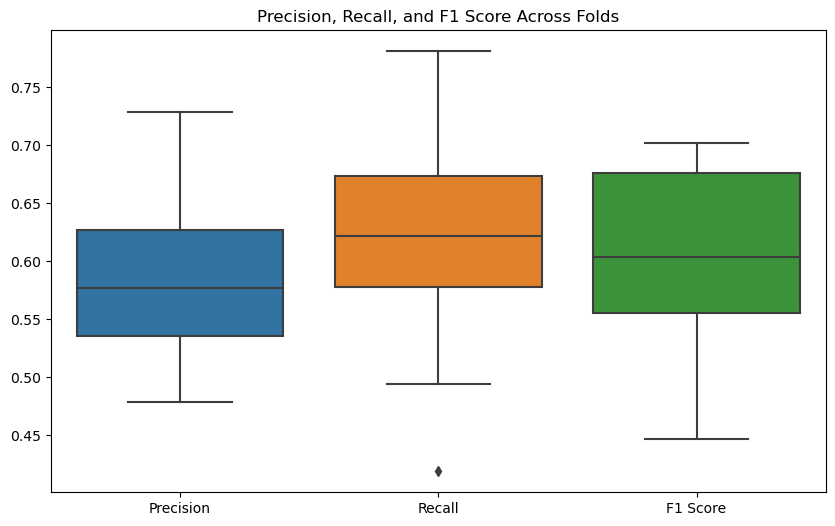

ValueError: All arrays must be of the same length

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_fscore_support
import pickle
from keras.models import load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# Path to the data directories
fold_data_dir = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/allFolds/10folds - 80-20 train test split (includes all subjects)'

# CNN Model
def build_model(input_shape, learning_rate = 0.001):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Dimensions of the images (224x224 with 3 channels)
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# # Create the CNN model
# model = build_model(input_shape)
# model.summary()

# Data generator for training and testing (no validation)
data_generator = ImageDataGenerator(rescale=1.0/255.0)

# Lists to store results for each fold
fold_accuracies = []
precision_list = []
recall_list = []
f1_list = []

for fold_number in range(1, 11):
    # Create the CNN model
    model = build_model(input_shape, learning_rate=0.0001)
    model.summary()
    # Update fold path 
    fold_path = os.path.join(fold_data_dir, f'fold{fold_number}')

    # Training data
    train_data_dir = os.path.join(fold_path, 'Training')
    print(f"\nFold {fold_number} - Training Data Directory:", train_data_dir)
    
    train_generator = data_generator.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

    print("Number of Training Samples:", train_generator.samples)

    # Testing data
    test_data_dir = os.path.join(fold_path, 'Testing')
    print(f"\nFold {fold_number} - Testing Data Directory:", test_data_dir)

    test_generator = data_generator.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

    print("Number of Test Samples:", test_generator.samples)

    # Define Early Stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Training the model with Early Stopping callback
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=60,
        # validation_data=test_generator,
        # validation_steps=test_generator.samples // test_generator.batch_size,
        callbacks=[early_stopping])
    
    # # Training the model
    # history = model.fit(
    #     train_generator,
    #     steps_per_epoch=train_generator.samples // train_generator.batch_size,
    #     epochs=60)

    # Save the model after training
    model.save(f'10fold_model_early_stopping_fold_{fold_number}.h5')

    # Load the saved model for testing
    loaded_model = load_model(f'10fold_model_early_stopping_fold_{fold_number}.h5')

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
    print(f'\nEvaluation for Fold {fold_number}:')
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    # Store the accuracy for this fold
    fold_accuracies.append(test_accuracy)

    # Evaluate precision, recall, and F1 score
    predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)
    true_labels = np.argmax(test_generator.labels, axis=1) if len(test_generator.labels.shape) > 1 else test_generator.labels
    predicted_labels = np.argmax(predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')

    # Store the results for this fold
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

     # Save classification results to a file
    results_filename = f'10fold_classification_results_early_stopping_fold_{fold_number}.txt'
    with open(results_filename, 'w') as results_file:
        results_file.write("Image Name\tTrue Label\tPredicted Label\n")
        for i in range(len(test_generator.filenames)):
            image_name = os.path.basename(test_generator.filenames[i])
            true_label = true_labels[i]
            predicted_label = predicted_labels[i]
            results_file.write(f"{image_name}\t{true_label}\t{predicted_label}\n")

# Save precision, recall, and f1_list to a file
results = {
    'precision_list': precision_list,
    'recall_list': recall_list,
    'f1_list': f1_list
}

with open('evaluation_results.pkl', 'wb') as file:
    pickle.dump(results, file)

# Boxplot for precision, recall, and F1 score
df_boxplot = pd.DataFrame({
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot)
plt.title('Precision, Recall, and F1 Score Across Folds')
plt.show()

# Summary table
df_summary = pd.DataFrame({
    'Fold': range(1, 10),
    'Accuracy': fold_accuracies,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
})

# Display the summary table
print("\nSummary of Results:")
print(df_summary)

import pickle

# Load the results from the file
with open('evaluation_results.pkl', 'rb') as file:
    loaded_results = pickle.load(file)

# Access individual lists
precision_list_loaded = loaded_results['precision_list']
recall_list_loaded = loaded_results['recall_list']
f1_list_loaded = loaded_results['f1_list']

# Print the loaded results
print("Precision List:", precision_list_loaded)
print("Recall List:", recall_list_loaded)
print("F1 List:", f1_list_loaded)


# Combine the lists into a single list of lists
data = [precision_list, recall_list, f1_list]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot
bp = ax.boxplot(data, labels=['Precision', 'Recall', 'F1 Score'])

# Set labels and title
ax.set_ylabel('Score')
ax.set_title('Boxplot of Precision, Recall, and F1 Score')

# Show the plot
plt.show()

# # Create a DataFrame for easy summary and visualization
# df_results = pd.DataFrame({
#     'Fold': np.repeat(range(1, 11), 3),
#     'Metric': ['Precision'] * 10 + ['Recall'] * 10 + ['F1 Score'] * 10,
#     'Score': precision_list + recall_list + f1_list
# })

# # Visualize the results with a single boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Metric', y='Score', data=df_results)
# plt.title('Performance Across 5-Folds')
# plt.show()

# # Summary table
# summary_table = df_results.groupby('Metric')['Score'].describe()[['min', 'mean', 'max']]
# summary_table.columns = ['Worst Fold', 'Avg. Fold', 'Best Fold']
# print("\nSummary of Results:")
# print(summary_table)



In [3]:
# Given values
fold_accuracies_2 = [0.715624988079071, 0.6625000238418579, 0.5375000238418579, 0.4749999940395355,
                     0.515625, 0.4749999940395355, 0.6000000238418579, 0.546875, 0.668749988079071,
                     0.512499988079071]

# Calculate the average
average_accuracy_2 = sum(fold_accuracies_2) / len(fold_accuracies_2)

# Print the result
print("Average Accuracy (Set 2):", average_accuracy_2)


Average Accuracy (Set 2): 0.5709375023841858


using lower learning rate and data augmentation

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_fscore_support
import pickle
from keras.models import load_model
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.optimizers import Adam


# Path to the data directories
fold_data_dir = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/allFolds/10folds - 80-20 train test split (includes all subjects)'

# CNN Model
def build_model(input_shape, learning_rate = 0.01):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# # CNN Model
# def build_model(input_shape, learning_rate = 0.001):
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(256, activation='relu'))  # Reduced dense layer size
#     model.add(Dropout(0.6))  # Increased dropout rate
#     model.add(Dense(2, activation='softmax'))
#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
#     return model

# Dimensions of the images (224x224 with 3 channels)
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Data generator for training and testing (with augmentation for training)
train_data_generator = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_data_generator = ImageDataGenerator(rescale=1.0/255.0)

# Lists to store results for each fold
fold_accuracies = []
precision_list = []
recall_list = []
f1_list = []

for fold_number in range(1, 11):
    # Create the CNN model
    model = build_model(input_shape, learning_rate=0.01)
    model.summary()
    # Update fold path 
    fold_path = os.path.join(fold_data_dir, f'fold{fold_number}')

    # Training data
    train_data_dir = os.path.join(fold_path, 'Training')
    print(f"\nFold {fold_number} - Training Data Directory:", train_data_dir)
    
    train_generator = train_data_generator.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical'
    )
    print("Number of Training Samples:", train_generator.samples)

   # Testing data
    test_data_dir = os.path.join(fold_path, 'Testing')
    print(f"\nFold {fold_number} - Testing Data Directory:", test_data_dir)

    test_generator = test_data_generator.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    print("Number of Test Samples:", test_generator.samples)

    # Training the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=100)

    # Save the model after training
    model.save(f'10fold_model_0.01LR_fold_{fold_number}.h5')

    # Load the saved model for testing
    loaded_model = load_model(f'10fold_model_0.01LR_fold_{fold_number}.h5')

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
    print(f'\nEvaluation for Fold {fold_number}:')
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    # Store the accuracy for this fold
    fold_accuracies.append(test_accuracy)

    # Evaluate precision, recall, and F1 score
    predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)
    true_labels = np.argmax(test_generator.labels, axis=1) if len(test_generator.labels.shape) > 1 else test_generator.labels
    predicted_labels = np.argmax(predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')

    # Store the results for this fold
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

     # Save classification results to a file
    results_filename = f'10fold_classification_results_0.01LR_fold_{fold_number}.txt'
    with open(results_filename, 'w') as results_file:
        results_file.write("Image Name\tTrue Label\tPredicted Label\n")
        for i in range(len(test_generator.filenames)):
            image_name = os.path.basename(test_generator.filenames[i])
            true_label = true_labels[i]
            predicted_label = predicted_labels[i]
            results_file.write(f"{image_name}\t{true_label}\t{predicted_label}\n")

# Save precision, recall, and f1_list to a file
results = {
    'precision_list': precision_list,
    'recall_list': recall_list,
    'f1_list': f1_list
}

with open('evaluation_results.pkl', 'wb') as file:
    pickle.dump(results, file)

# Boxplot for precision, recall, and F1 score
df_boxplot = pd.DataFrame({
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot)
plt.title('Precision, Recall, and F1 Score Across Folds')
plt.show()

# Summary table
df_summary = pd.DataFrame({
    'Fold': range(1, 10),
    'Accuracy': fold_accuracies,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
})

# Display the summary table
print("\nSummary of Results:")
print(df_summary)

import pickle

# Load the results from the file
with open('evaluation_results.pkl', 'rb') as file:
    loaded_results = pickle.load(file)

# Access individual lists
precision_list_loaded = loaded_results['precision_list']
recall_list_loaded = loaded_results['recall_list']
f1_list_loaded = loaded_results['f1_list']

# Print the loaded results
print("Precision List:", precision_list_loaded)
print("Recall List:", recall_list_loaded)
print("F1 List:", f1_list_loaded)


# Combine the lists into a single list of lists
data = [precision_list, recall_list, f1_list]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot
bp = ax.boxplot(data, labels=['Precision', 'Recall', 'F1 Score'])

# Set labels and title
ax.set_ylabel('Score')
ax.set_title('Boxplot of Precision, Recall, and F1 Score')

# Show the plot
plt.show()

2024-01-22 19:07:35.851154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 19:07:40.903904: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

2024-01-22 19:07:43.946738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 67s 1s/step - loss: 82.9800 - accuracy: 0.4958
Epoch 2/100
45/45 [==============================] - 70s 2s/step - loss: 0.6940 - accuracy: 0.5028
Epoch 3/100
45/45 [==============================] - 67s 1s/step - loss: 0.6943 - accuracy: 0.4729
Epoch 4/100
45/45 [==============================] - 68s 1s/step - loss: 0.6933 - accuracy: 0.4819
Epoch 5/100
45/45 [==============================] - 65s 1s/step - loss: 0.6938 - accuracy: 0.4799
Epoch 6/100
45/45 [==============================] - 68s 2s/step - loss: 0.6935 - accuracy: 0.5000
Epoch 7/100
45/45 [==============================] - 70s 2s/step - loss: 0.6936 - accuracy: 0.4903
Epoch 8/100
45/45 [==============================] - 71s 2s/step - loss: 0.6935 - accuracy: 0.5000
Epoch 9/100
45/45 [==============================] - 76s 2s/step - loss: 0.6938 - accuracy: 0.4986
Epoch 10/100
45/45 [==============================] - 73s 2s/step - loss: 0.6936 - accuracy: 0.4931
Epoch 11/100
45/45 [

2024-01-22 21:15:36.800834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 332ms/step - loss: 0.6932 - accuracy: 0.5000

Evaluation for Fold 1:
Test Loss: 0.6932356953620911
Test Accuracy: 0.5


2024-01-22 21:15:41.032007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 299ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 

2024-01-22 21:15:49.222645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 70s 1s/step - loss: 16.1869 - accuracy: 0.4951
Epoch 2/100
45/45 [==============================] - 71s 2s/step - loss: 0.6933 - accuracy: 0.4896
Epoch 3/100
45/45 [==============================] - 77s 2s/step - loss: 0.6941 - accuracy: 0.4944
Epoch 4/100
45/45 [==============================] - 71s 2s/step - loss: 0.6936 - accuracy: 0.4764
Epoch 5/100
45/45 [==============================] - 70s 2s/step - loss: 0.6948 - accuracy: 0.4729
Epoch 6/100
45/45 [==============================] - 68s 1s/step - loss: 0.6939 - accuracy: 0.5021
Epoch 7/100
45/45 [==============================] - 74s 2s/step - loss: 0.6928 - accuracy: 0.5139
Epoch 8/100
45/45 [==============================] - 71s 2s/step - loss: 0.6942 - accuracy: 0.4875
Epoch 9/100
45/45 [==============================] - 71s 2s/step - loss: 0.6936 - accuracy: 0.4965
Epoch 10/100
45/45 [==============================] - 67s 1s/step - loss: 0.6934 - accuracy: 0.5000
Epoch 11/100
45/45 [

2024-01-22 23:25:45.862585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 3s 229ms/step - loss: 0.6931 - accuracy: 0.5000

Evaluation for Fold 2:
Test Loss: 0.6931475400924683
Test Accuracy: 0.5


2024-01-22 23:25:49.004893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 3s 226ms/step


/home/wangg/miniconda3/envs/REU-Hearing-Loss-Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 128)     

2024-01-22 23:25:53.544688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 73s 2s/step - loss: 36.8477 - accuracy: 0.5049
Epoch 2/100
45/45 [==============================] - 69s 2s/step - loss: 0.6945 - accuracy: 0.4903
Epoch 3/100
45/45 [==============================] - 71s 2s/step - loss: 0.6939 - accuracy: 0.4965
Epoch 4/100
45/45 [==============================] - 73s 2s/step - loss: 0.6937 - accuracy: 0.4736
Epoch 5/100
45/45 [==============================] - 67s 1s/step - loss: 0.6930 - accuracy: 0.5028
Epoch 6/100
45/45 [==============================] - 70s 2s/step - loss: 0.6938 - accuracy: 0.4806
Epoch 7/100
45/45 [==============================] - 70s 2s/step - loss: 0.6946 - accuracy: 0.4701
Epoch 8/100
45/45 [==============================] - 65s 1s/step - loss: 0.6937 - accuracy: 0.4868
Epoch 9/100
45/45 [==============================] - 67s 1s/step - loss: 0.6934 - accuracy: 0.4861
Epoch 10/100
45/45 [==============================] - 69s 2s/step - loss: 0.6935 - accuracy: 0.5000
Epoch 11/100
45/45 [

2024-01-23 01:30:59.512357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 3s 305ms/step - loss: 0.6931 - accuracy: 0.5000

Evaluation for Fold 3:
Test Loss: 0.693147599697113
Test Accuracy: 0.5


2024-01-23 01:31:03.166914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 310ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-23 01:31:08.880200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 67s 1s/step - loss: 12.5301 - accuracy: 0.5028
Epoch 2/100
45/45 [==============================] - 71s 2s/step - loss: 0.7434 - accuracy: 0.5188
Epoch 3/100
45/45 [==============================] - 70s 2s/step - loss: 0.6945 - accuracy: 0.4854
Epoch 4/100
45/45 [==============================] - 65s 1s/step - loss: 0.6942 - accuracy: 0.4903
Epoch 5/100
45/45 [==============================] - 57s 1s/step - loss: 0.6938 - accuracy: 0.4826
Epoch 6/100
45/45 [==============================] - 67s 1s/step - loss: 0.6941 - accuracy: 0.4535
Epoch 7/100
45/45 [==============================] - 73s 2s/step - loss: 0.6936 - accuracy: 0.4750
Epoch 8/100
45/45 [==============================] - 69s 2s/step - loss: 0.6935 - accuracy: 0.4986
Epoch 9/100
45/45 [==============================] - 64s 1s/step - loss: 0.6937 - accuracy: 0.5063
Epoch 10/100
45/45 [==============================] - 64s 1s/step - loss: 0.6940 - accuracy: 0.4785
Epoch 11/100
45/45 [

2024-01-23 03:07:57.420562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 155ms/step - loss: 0.6932 - accuracy: 0.5000

Evaluation for Fold 4:
Test Loss: 0.6931899785995483
Test Accuracy: 0.5


2024-01-23 03:07:59.655618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 170ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-23 03:08:03.377584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 46s 992ms/step - loss: 6.8587 - accuracy: 0.4861
Epoch 2/100
45/45 [==============================] - 46s 1s/step - loss: 0.6933 - accuracy: 0.5104
Epoch 3/100
45/45 [==============================] - 44s 980ms/step - loss: 0.6937 - accuracy: 0.4903
Epoch 4/100
45/45 [==============================] - 43s 949ms/step - loss: 0.6935 - accuracy: 0.4944
Epoch 5/100
45/45 [==============================] - 33s 741ms/step - loss: 0.6933 - accuracy: 0.5021
Epoch 6/100
45/45 [==============================] - 47s 1s/step - loss: 0.6942 - accuracy: 0.4896
Epoch 7/100
45/45 [==============================] - 39s 869ms/step - loss: 0.6934 - accuracy: 0.5014
Epoch 8/100
45/45 [==============================] - 36s 795ms/step - loss: 0.6934 - accuracy: 0.4993
Epoch 9/100
45/45 [==============================] - 38s 839ms/step - loss: 0.6942 - accuracy: 0.4750
Epoch 10/100
45/45 [==============================] - 35s 772ms/step - loss: 0.6938 - accuracy: 0.49

2024-01-23 04:34:43.814865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 1s 128ms/step - loss: 0.6931 - accuracy: 0.5000

Evaluation for Fold 5:
Test Loss: 0.6931471824645996
Test Accuracy: 0.5


2024-01-23 04:34:45.431173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 1s 115ms/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

/home/wangg/miniconda3/envs/REU-Hearing-Loss-Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Found 1440 images belonging to 2 classes.
Number of Training Samples: 1440

Fold 6 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project-1/machine learning/allFolds/10folds - 80-20 train test split (includes all subjects)/fold6/Testing
Found 320 images belonging to 2 classes.
Number of Test Samples: 320
Epoch 1/100


2024-01-23 04:34:47.273944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 47s 1s/step - loss: 39.3888 - accuracy: 0.5035
Epoch 2/100
45/45 [==============================] - 31s 680ms/step - loss: 0.6947 - accuracy: 0.4694
Epoch 3/100
45/45 [==============================] - 44s 983ms/step - loss: 0.6938 - accuracy: 0.4965
Epoch 4/100
45/45 [==============================] - 34s 746ms/step - loss: 0.6923 - accuracy: 0.5319
Epoch 5/100
45/45 [==============================] - 42s 932ms/step - loss: 0.6954 - accuracy: 0.4729
Epoch 6/100
45/45 [==============================] - 48s 1s/step - loss: 0.6949 - accuracy: 0.4743
Epoch 7/100
45/45 [==============================] - 48s 1s/step - loss: 0.6937 - accuracy: 0.5007
Epoch 8/100
45/45 [==============================] - 46s 1s/step - loss: 0.6941 - accuracy: 0.4861
Epoch 9/100
45/45 [==============================] - 46s 1s/step - loss: 0.6947 - accuracy: 0.4889
Epoch 10/100
45/45 [==============================] - 43s 956ms/step - loss: 0.6941 - accuracy: 0.4889
Epoch

2024-01-23 06:03:15.975782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 1s 110ms/step - loss: 0.6931 - accuracy: 0.5000

Evaluation for Fold 6:
Test Loss: 0.6931480169296265
Test Accuracy: 0.5


2024-01-23 06:03:17.448938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 1s 128ms/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

/home/wangg/miniconda3/envs/REU-Hearing-Loss-Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number of Test Samples: 320
Epoch 1/100


2024-01-23 06:03:20.570306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 41s 888ms/step - loss: 3.8368 - accuracy: 0.4826
Epoch 2/100
45/45 [==============================] - 48s 1s/step - loss: 0.6945 - accuracy: 0.4924
Epoch 3/100
45/45 [==============================] - 46s 1s/step - loss: 0.6940 - accuracy: 0.4840
Epoch 4/100
45/45 [==============================] - 37s 821ms/step - loss: 0.6940 - accuracy: 0.4931
Epoch 5/100
45/45 [==============================] - 38s 847ms/step - loss: 0.6947 - accuracy: 0.5035
Epoch 6/100
45/45 [==============================] - 46s 1s/step - loss: 0.6952 - accuracy: 0.4958
Epoch 7/100
45/45 [==============================] - 44s 969ms/step - loss: 0.6936 - accuracy: 0.5215
Epoch 8/100
45/45 [==============================] - 42s 928ms/step - loss: 0.6960 - accuracy: 0.4736
Epoch 9/100
45/45 [==============================] - 47s 1s/step - loss: 0.6936 - accuracy: 0.4931
Epoch 10/100
45/45 [==============================] - 46s 1s/step - loss: 0.6937 - accuracy: 0.4847


Pretrained Model: # Freeze only the convolutional layers of the pre-trained model, LR = 0.0001, and freezing convolutional layers, epochs = 60

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import os
from keras.applications import ResNet50



# Paths to training and testing data
training_data_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/preTrainedModel/data/10folds - 70-15-15 train test split (includes all subjects)/fold1/Training'
testing_data_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/preTrainedModel/data/10folds - 70-15-15 train test split (includes all subjects)/fold1/Testing'

# Image dimensions
img_height, img_width = 224, 224

# Define batch size
batch_size = 32

# Create data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # bc we have two classes
)

# # Print the class names
# class_names = list(train_generator.class_indices.keys())
# print("Class Names:", class_names)

test_generator = test_datagen.flow_from_directory(
    testing_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained ResNet-50 model with weights from ImageNet
base_model = ResNet50(
    include_top=False, # don't want to include the top layer because we will define our own input/output layer
    weights='imagenet',
    input_tensor=None,
    input_shape=(img_height, img_width, 3),
    # pooling=None,
    pooling= 'max',
    classes=2,
)
# Freeze only the convolutional layers of the pre-trained model
for layer in base_model.layers:
    if isinstance(layer, keras.layers.Conv2D):
        layer.trainable = False

    
# Add custom classification layers on top of ResNet-50
# these new layers and specifically the 512 neurons are the ones that will be learning the new weights 
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)  # Assuming 2 classes: Healthy and Hearing Impaired


# Create the final model
model = keras.Model(base_model.input, x)

# Print model summary
model.summary()

# # Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(train_generator, epochs=10, validation_data=test_generator)
history = model.fit(train_generator, epochs=60)

# # Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Save accuracies during training
train_accuracies = history.history['accuracy']

# Evaluate the model on the testing data and get predictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Calculate precision, recall, and f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

# Save metrics to a text file
with open('classification_results_freeze_convolutionalLayersAndLowerLearningRate.txt', 'w') as file:
    file.write(f'Test Accuracy: {test_acc}\n')
    file.write(f'Precision: {precision}\n')
    file.write(f'Recall: {recall}\n')
    file.write(f'F1 Score: {f1_score}\n')

# Print confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

Found 1440 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
         

/home/wangg/miniconda3/envs/REU-Hearing-Loss-Project/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/60


2024-01-23 20:03:01.262332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 779s 17s/step - loss: 4.5333 - accuracy: 0.5063
Epoch 2/60
45/45 [==============================] - 727s 16s/step - loss: 2.0777 - accuracy: 0.6028
Epoch 3/60
45/45 [==============================] - 757s 17s/step - loss: 1.2978 - accuracy: 0.6549
Epoch 4/60
45/45 [==============================] - 717s 16s/step - loss: 0.7848 - accuracy: 0.7056
Epoch 5/60
45/45 [==============================] - 712s 16s/step - loss: 0.6277 - accuracy: 0.7215
Epoch 6/60
45/45 [==============================] - 761s 17s/step - loss: 0.5795 - accuracy: 0.7382
Epoch 7/60
45/45 [==============================] - 743s 16s/step - loss: 0.4945 - accuracy: 0.7667
Epoch 8/60
45/45 [==============================] - 708s 16s/step - loss: 0.4781 - accuracy: 0.7694
Epoch 9/60
45/45 [==============================] - 648s 14s/step - loss: 0.4187 - accuracy: 0.7951
Epoch 10/60
45/45 [==============================] - 517s 12s/step - loss: 0.4127 - accuracy: 0.8076
Epoch 11/6

2024-01-24 02:52:28.951410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 8s 748ms/step - loss: 1.2511 - accuracy: 0.5781
Test Accuracy: 0.578125


2024-01-24 02:52:37.554158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 9s 788ms/step
Confusion Matrix:
[[ 57 103]
 [ 68  92]]


Freeze only the convolutional layers of the pre-trained model, LR = 0.001, and freezing convolutional layers, epochs = 10 and adding data augmentation

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import os
from keras.applications import ResNet50



# Paths to training and testing data
training_data_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/preTrainedModel/data/10folds - 70-15-15 train test split (includes all subjects)/fold1/Training'
testing_data_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/preTrainedModel/data/10folds - 70-15-15 train test split (includes all subjects)/fold1/Testing'

# Image dimensions
img_height, img_width = 224, 224

# Define batch size
batch_size = 32

# Create data generators for training and testing with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)
# Create data generators for training and testing
# train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # bc we have two classes
)

# # Print the class names
# class_names = list(train_generator.class_indices.keys())
# print("Class Names:", class_names)

test_generator = test_datagen.flow_from_directory(
    testing_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained ResNet-50 model with weights from ImageNet
base_model = ResNet50(
    include_top=False, # don't want to include the top layer because we will define our own input/output layer
    weights='imagenet',
    input_tensor=None,
    input_shape=(img_height, img_width, 3),
    # pooling=None,
    pooling= 'max',
    classes=2,
)
# Freeze only the convolutional layers of the pre-trained model
for layer in base_model.layers:
    if isinstance(layer, keras.layers.Conv2D):
        layer.trainable = False

    
# Add custom classification layers on top of ResNet-50
# these new layers and specifically the 512 neurons are the ones that will be learning the new weights 
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)  # Assuming 2 classes: Healthy and Hearing Impaired


# Create the final model
model = keras.Model(base_model.input, x)

# Print model summary
model.summary()

# # Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(train_generator, epochs=10, validation_data=test_generator)
history = model.fit(train_generator, epochs=10)

# # Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Save accuracies during training
train_accuracies = history.history['accuracy']

# Evaluate the model on the testing data and get predictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Calculate precision, recall, and f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

# Save metrics to a text file
with open('classification_results_dataAgumentation_freeze convlayers_.txt', 'w') as file:
    file.write(f'Test Accuracy: {test_acc}\n')
    file.write(f'Precision: {precision}\n')
    file.write(f'Recall: {recall}\n')
    file.write(f'F1 Score: {f1_score}\n')

# Print confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

Found 1440 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
         

/home/wangg/miniconda3/envs/REU-Hearing-Loss-Project/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10


2024-01-24 05:14:35.251008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
